In [1]:
import seaborn as sns
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
sns.set()
%matplotlib inline

C:\Users\khali\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mta_incidents = pd.read_csv('MTA_Subway_Major_Incidents__Beginning_2015.csv')

In [3]:
mta_incidents.head()

,month,division,line,category,count
0,2015-01,B DIVISION,Q,Track,2
1,2015-01,B DIVISION,A,Persons on Trackbed/Police/Medical,1
2,2015-01,B DIVISION,E,Track,2
3,2015-01,B DIVISION,A,Track,2
4,2015-01,B DIVISION,C,Persons on Trackbed/Police/Medical,1


In [4]:
mta_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     3173 non-null   object
 1   division  3173 non-null   object
 2   line      3173 non-null   object
 3   category  3173 non-null   object
 4   count     3173 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 124.1+ KB


# Feature Engineering

In [5]:
# renaming column names using dictionary
dict = {'month': 'Date','division': 'Division','line': 'Train Line', 'count' : 'Incident Count', 'category': 'Incident Type'}
 
#rename columns in DataFrame using dictionary
mta_incidents.rename(columns=dict, inplace=True)

mta_incidents.head()

,Date,Division,Train Line,Incident Type,Incident Count
0,2015-01,B DIVISION,Q,Track,2
1,2015-01,B DIVISION,A,Persons on Trackbed/Police/Medical,1
2,2015-01,B DIVISION,E,Track,2
3,2015-01,B DIVISION,A,Track,2
4,2015-01,B DIVISION,C,Persons on Trackbed/Police/Medical,1


In [6]:
mta_incidents['Date'].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', 

In [7]:
#changing Date to datetime
from datetime import datetime
mta_incidents['Date'] = pd.to_datetime(mta_incidents['Date'])
mta_incidents.set_index('Date', inplace=True)


# EDA and MTA Analysis

**Number of unique trains in NYC is 26**

In [8]:
print(mta_incidents['Train Line'].nunique())
print(mta_incidents['Train Line'].unique())

26
['Q' 'A' 'E' 'C' 'F' '6' 'M' '5' '2' '1' '4' 'N' '3' 'R' '7' 'B' 'JZ' 'D'
 'L' 'G' 'S 42nd' 'NONE' 'S Rock' 'W' 'All' 'S Fkln']


**7 Main incidents in the Subways**

In [9]:
print(mta_incidents['Incident Type'].nunique())
print(mta_incidents['Incident Type'].unique())

7
['Track' 'Persons on Trackbed/Police/Medical' 'Signals' 'Subway Car'
 'Other' 'Stations and Structure' 'Estimate due to Incomplete Data']


In [10]:
mta_incidents.groupby('Incident Type')[["Incident Count"]].sum().sort_values(by='Incident Count', ascending=False)

,Incident Count
Incident Type,
Signals,1490
Persons on Trackbed/Police/Medical,1088
Track,979
Other,485
Subway Car,340
Stations and Structure,268
Estimate due to Incomplete Data,102


In [11]:
mta_incidents.groupby('Train Line')[["Incident Count"]].sum().sort_values(by='Incident Count', ascending=False)[:10]

,Incident Count
Train Line,
6,420
7,369
F,367
5,343
4,339
2,330
N,304
E,293
R,242


In [12]:
mta_incidents.groupby('Date')[["Incident Count"]].sum().sort_values(by='Date', ascending=False)

,Incident Count
Date,
2022-06-01,35
2022-05-01,35
2022-04-01,35
2022-03-01,51
2022-02-01,43
...,...
2015-05-01,63
2015-04-01,54
2015-03-01,74


## Data Visualization

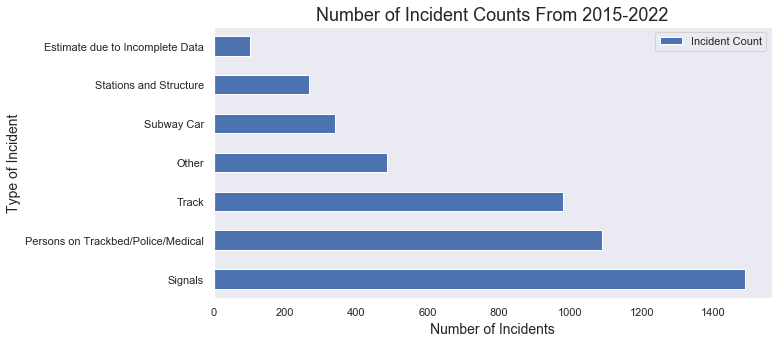

In [13]:
inc_count = mta_incidents.groupby('Incident Type')[["Incident Count"]].sum().sort_values(by='Incident Count', ascending=False)
inc_count.plot.barh(figsize = (10,5))
title("Number of Incident Counts From 2015-2022", fontsize = 18)
ylabel("Type of Incident", fontsize = 14)
xlabel("Number of Incidents", fontsize = 14)
grid()
show()

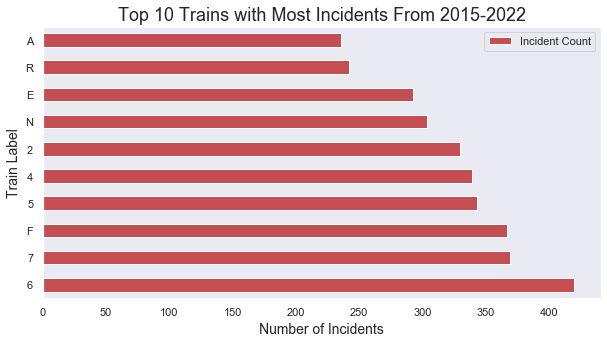

In [14]:
trains = mta_incidents.groupby('Train Line')[["Incident Count"]].sum().sort_values(by='Incident Count', ascending=False)[:10]
trains.plot.barh(figsize = (10,5), color = 'r')
title("Top 10 Trains with Most Incidents From 2015-2022", fontsize = 18)
ylabel("Train Label", fontsize = 14)
xlabel("Number of Incidents", fontsize = 14)
grid()
show()

In [15]:
data_per_year = mta_incidents[mta_incidents.columns].resample('M').sum()

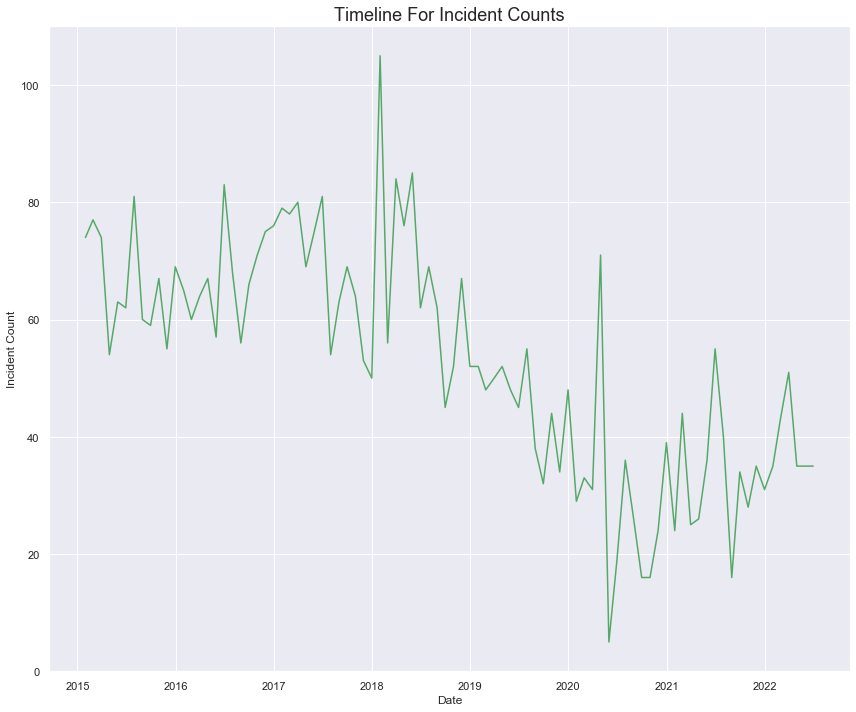

In [16]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

sns.lineplot(x=data_per_year.index, y=data_per_year["Incident Count"], color='g')
title("Timeline For Incident Counts", fontsize=18)
tight_layout()
show()

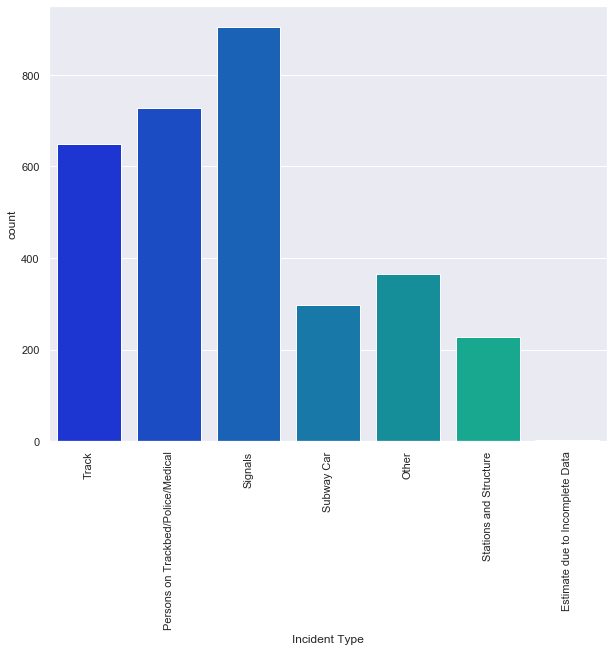

In [17]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.countplot(mta_incidents["Incident Type"], palette = "winter")
plt.xticks(rotation=90)
show()